In [2]:
import numpy as np
import astropy.coordinates as coord
import astropy.units as u
# Set up matplotlib
import matplotlib.pyplot as plt
#%matplotlib widget
from astropy.io import fits
import plotly.express as px
from astropy.table import Table
#from sklearn import preprocessing
from scipy.interpolate import splrep,splev


# Read the spectra fits files

page to create and download syntethic spectra: 
https://phoenix.astro.physik.uni-goettingen.de/?page_id=15

here we also select a shorter segment of the spectra to work with.

https://iopscience.iop.org/article/10.1086/303479/pdf

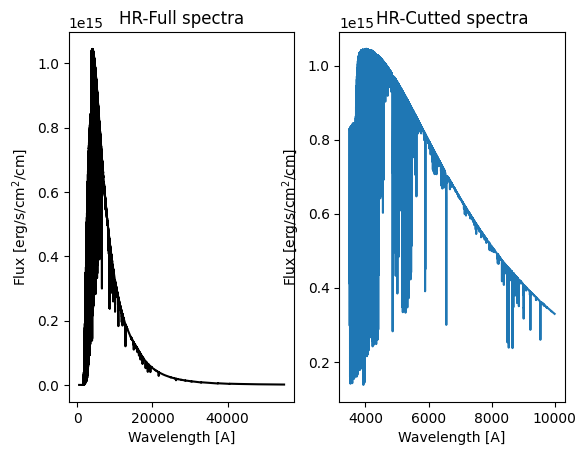

In [3]:
# Load wavelength array:
wave_hdu   = fits.open('WAVE_PHOENIX-ACES-AGSS-COND-2011.fits')[0]
wavelength = wave_hdu.data

# Load model spectrum:
model_hdu = fits.open('spec_6.fits')[0] 
model     = model_hdu.data

# Plot full spectra:
plt.close()
plt.subplot(1, 2, 1)
plt.plot(wavelength,model,'k')
plt.title('HR-Full spectra')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
#plt.savefig('spectrum.pdf')

#select a segment of the spectra:
n=len(wavelength)
i=0
t1=[]    
t2=[]

while (i<n):
    if (wavelength[i]>3500 and wavelength[i]<10000):
        t1.append(wavelength[i])
        t2.append(model[i])
    i=i+1     
    
#save the cutted spectra in a new txt file:  
# uncomment this if whant to save it
#b = list(zip(*[t1,t2]))
#header = 'wave flux'
#np.savetxt("FileName-recortado.txt", b, fmt="%f", header=header)

#plot the cutted spectra:
plt.subplot(1, 2, 2)
plt.plot(t1, t2)
plt.title('HR-Cutted spectra')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
plt.show()



# Fit & remove the continuum 

fitting models:
https://het.as.utexas.edu/HET/Software/Astropy-1.0/modeling/index.html


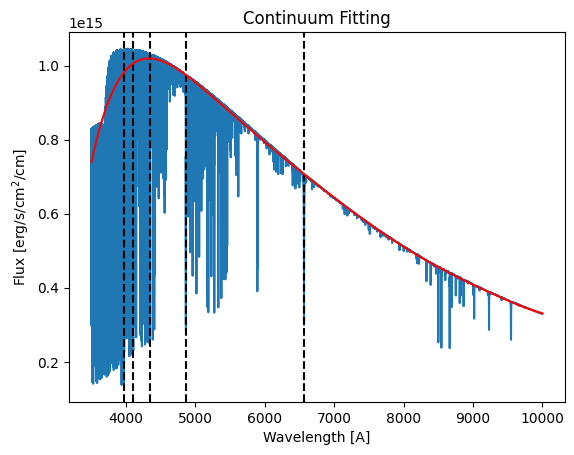

In [4]:
# continuum fitting
from astropy.modeling import models, fitting
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

model  = models.Legendre1D(7)
fit = fitting.LinearLSQFitter()
flux_fit  = fit(model, t1, t2)
Balmer =[6562.79, 4861.35, 4340.472, 4101.734, 3970.075]

#plot the continuum model
plt.close()
plt.plot(t1, t2 )
for x in Balmer:
    plt.axvline(x=x, color='k', linestyle='--')
 
plt.plot(t1, flux_fit(t1), 'r-')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
plt.title('Continuum Fitting')
plt.show()
#plt.savefig('Na_fitting.png')

page to search for spectral lines wavelength of any element

NIST : https://physics.nist.gov/PhysRefData/ASD/lines_form.html

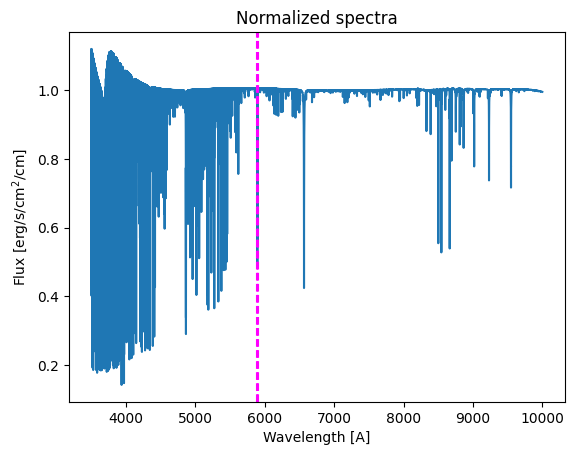

In [5]:
#create the "continuum removed" spectra 
wl  = t1
flr = t2 / flux_fit(t1)

# define some spectral lines centroids for different elements
# you may identify more lines
Balmer =[6562.85175, 4861.35, 4340.472, 4101.734, 3970.075]
CaI   = [4578.55, 4581.40, 5041.62, 5380.32, 6439.07 ]
FeI   = [4045.8122, 4472.7110, 4482.1696, 4714.359, 4925.2831, 5016.4787, 5049.8194, 5877.788 ]
CaII  = [3706.024, 3933.66, 3968.47, 4220.07, 5307.22, 7291.47]
FeII  = [3935.942, 6679.742, 7030.2581]
HeI   = [3935.912, 7065.71, 7281.349  ]
NaI   = [5889.950, 5895.924 ]
#plot the continuum removed spectra
plt.close()
plt.plot(wl, flr)

#plot the spectral lines identified by colors
#for x in Balmer:
   # plt.axvline(x=x, color='k', linestyle='--')
    
#for c in CaI:
    #plt.axvline(x=c, color='r', linestyle='--')

#for f in FeI:
    #plt.axvline(x=f, color='g', linestyle='--')

#for fe in FeII:
    #plt.axvline(x=fe, color='y', linestyle='--')

#for ca in CaII:
    #plt.axvline(x=ca, color='b', linestyle='--')

#for H in HeI:
    #plt.axvline(x=H, color='cyan', linestyle='--')

for n in NaI:
    plt.axvline(x=n, color='magenta', linestyle='--')
    
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
plt.title('Normalized spectra')
plt.show()

#plt.savefig('Na_spectra.png')


#save the continuum removed spectra 
#(check the name of the file acording to the spectra you are reading)
#uncomment to skip this step

#b = list(zip(*[wl,flr]))
#header = 'wave flux'
#np.savetxt("FileName_norm.txt", b, fmt="%f", header=header)


# Select an specific segment to analyse

You have to select the initial and final wavelength for each line you want to analyse, and its corresponding flux.

It is possible to save it as a new txt file or work directly with the arrays if you asign diffrent names to the array for each desired spectral line.

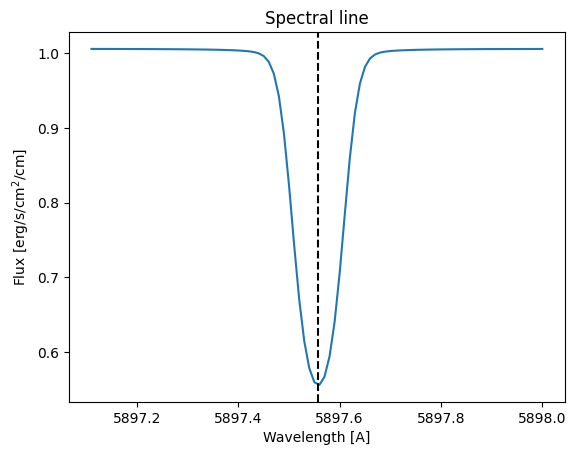

In [49]:
# H alpha segment
# you may select a different spectral line: change C and r respectively

n=len(wl)
i=0
Haw=[]    
Haf=[]

C=NaI[1]+1.633 # center wavelength corresponding to Ha (Angstrom)
r=0.45  # desired radius arroudn the central wavelength (Angstrom)

while (i<n):
    if ( C-r <wl[i]< C+r):
        Haw.append(wl[i])
        Haf.append(flr[i])
    i=i+1     
  
#save the Ha spectral line segment

#b = list(zip(*[Haw,Haf]))
#header = 'wave flux'
#np.savetxt("Ha-test.txt", b, fmt="%f", header=header)

#plot Ha spectral line 

plt.close()
plt.plot(Haw,Haf)
plt.axvline(x=C, color='k', linestyle='--')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
plt.title('Spectral line')
plt.show()

#plt.savefig('Na_firstline.png')

# Equivalent width calculation for the specific line

links to fit gaussians and diffrent comands for the library specutils

https://python4vienna.readthedocs.io/en/latest/_static/Astropy%20-%20Modeling%20-%20Solutions.html

https://docs.astropy.org/en/stable/modeling/compound-models.html#basics

http://eteq.github.io/specutils/index.html


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00527154562579989
            Iterations: 63
            Function evaluations: 346
            Gradient evaluations: 63


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


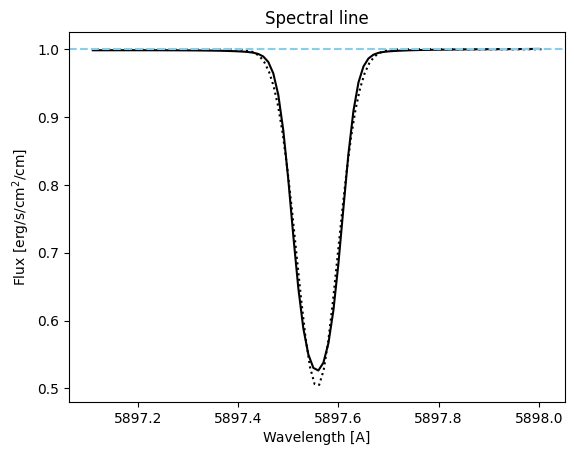

Equivalent width= 0.0514473848642529 Angstrom


In [50]:
from specutils.analysis import equivalent_width
from specutils import Spectrum1D
from astropy.io import ascii
from array import array
#read the Ha spectral line segment

#tbl1 = ascii.read("Ha-test.txt")
#wl2=tbl1["wave"]
#flr2=tbl1["flux"]

#fit the continum again
c = models.Linear1D()
fitter = fitting.LinearLSQFitter()
c_new = fitter(c, Haw, Haf)

i_l =c_new.intercept
m_l =c_new.slope

l1=models.Linear1D(m_l, i_l)
lx1= Haw
ly1= l1(lx1)
Haf1 = Haf/ly1
  
#fit a gaussian to your spectral line 

m = models.Gaussian1D(mean=C) + models.Const1D() 
fitter = fitting.SLSQPLSQFitter()
m_new = fitter(m, Haw, Haf1)

#define parameters of the gaussian model

a_g =m_new.amplitude_0  #gaussian amplitude
sd_g=m_new.stddev_0    #gaussian standar deviation 
m_g =m_new.mean_0      #gaussian mean
a_c =m_new.amplitude_1  #base level of the continuum
dif= 1- a_c

# create the gaussian with the model 
g1 = models.Gaussian1D(a_g, m_g, sd_g)
x = np.linspace(C-r, C+r, 100)
y = g1(x) +1


#asign unit to the arrays
lamb = Haw * u.AA
Haf2 = Haf1+dif
flux = Haf2 *u.erg *u.s**-1*u.cm**-2 /u.AA


#create an spectrum
spec = Spectrum1D(spectral_axis=lamb, flux=flux)

#calculate the equivalent width
ew= equivalent_width(spec, continuum=1, regions=None)


#plot the recently created segment
plt.close()
plt.plot(Haw, Haf2, 'black') # spectrum
plt.plot(x,y, 'black', linestyle = ':' )   # gaussian
plt.axhline(y = 1, color = 'skyblue', linestyle = '--')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux [erg/s/cm$^2$/cm]')
plt.title('Spectral line')
plt.show()
#print info of the gaussian model+constant,  the parameters to fit the continuum 
#and the result of the equivalent width
#print (m_new)
#print (c_new)
print ("Equivalent width=", ew)

#plt.savefig('Na_firstline_fit.png')

#  Generalised curve of growth

Find the Log(w/lambda) corresponding to your equivalent width of the line you measure earlier and search the result in the Generalized Curve of Growth. 
For that, drag the cursor over the line to obtain the value Naf and continue with the calculations. 

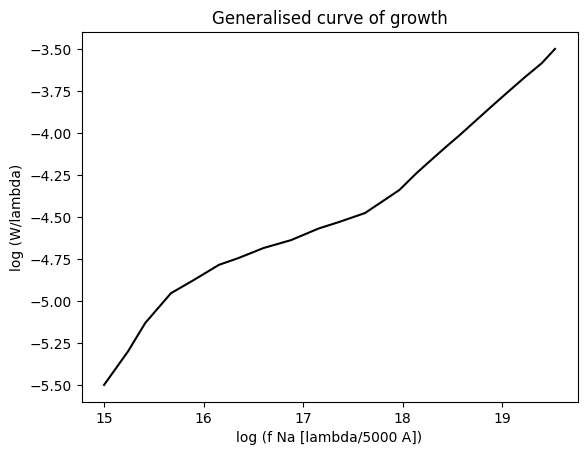

In [51]:
from astropy.io import ascii

tbl1 = ascii.read("COGdata.txt")
w=tbl1["logW"]
N=tbl1["logN"]

plt.close()
plt.plot(N, w, 'black') # spectrum
plt.xlabel('log (f Na [lambda/5000 A])')
plt.ylabel('log (W/lambda)')
plt.title('Generalised curve of growth')
plt.show()
#plt.savefig('Na_firstline_curveofgrowth.png')

In [52]:
LW= np.log10(ew.value/NaI[1]) # Log(W) for the line you recently measure, CHANGE LAMBDA! 
print('Log (W/lamb)',LW)

Log (W/lamb) -5.059188572796979


In [53]:
#Nalpha, numero de nose
Nalpha=(10**(15.65))*5000/(0.641*C)
print('Na=', Nalpha)

Na= 5907991037022788.0


In [54]:
#Nalpha primera linea
Nalpha1=5913981674590854.0
Nalpha1=5.91*10**15

In [55]:
#Nalpha segunda linea
Nalpha2=6654997228909736.0
Nalpha2=6.65*10**15

In [56]:
#constantes
from astropy import units as u
from astropy.constants import k_B, m_e, h, c
T=5777*u.K
Z_I=2.4
Z_II=1
P_e=1*u.N/u.m**2
xi=5.14*u.eV

In [57]:
#Ecuación de Boltzmann 
#Cambiar variables dependiendo de la línea
g0=2
gm=2

B=(gm/g0)*np.exp(-h*c/(C*k_B*T*u.AA))
print(B)

0.014654920500539086


In [58]:
#Ecuación de Saha
#Cambiar Nalpha1 o Nalpha2
N_2=(((2*k_B*T*Z_II)/(P_e*Z_I))*np.exp((-xi/((k_B*T).decompose().to(u.eV))))*Nalpha2*((2*np.pi*m_e*k_B*T)/h**2)**(3/2)).decompose().to(u.dimensionless_unscaled)

S=N_2/Nalpha2
print('Ecuación de Saha', S)

Ecuación de Saha 2311.799970938619
